In [1]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
# Loading and examining the dataset
penguins_df = pd.read_csv("../data/penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [4]:
# Dropping categorical features
penguins = penguins_df.drop(columns = ['sex'])
penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0


In [5]:
# Standard Scaler for normalizing values
scaler = StandardScaler()
X = scaler.fit_transform(penguins)
preprocessed_penguins = pd.DataFrame(data=X, columns = penguins.columns)
preprocessed_penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,-0.903906,0.790360,-1.425342,-0.566948
1,-0.830434,0.126187,-1.068577,-0.504847
2,-0.683490,0.432728,-0.426399,-1.187953
3,-1.344738,1.096901,-0.569105,-0.939551
4,-0.867170,1.761074,-0.783164,-0.691149


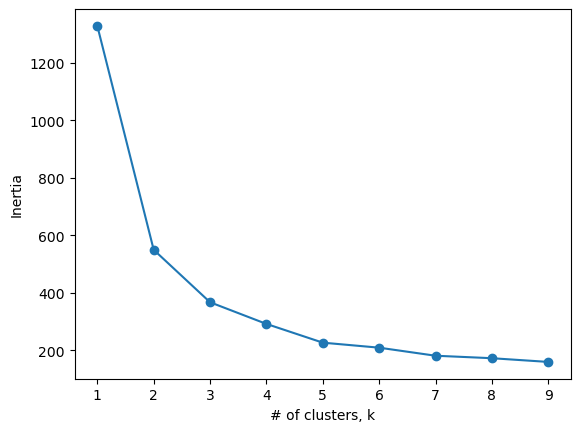

In [6]:
# Finding optimal number of clusters by using Inertia
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(preprocessed_penguins)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o')
plt.xlabel('# of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

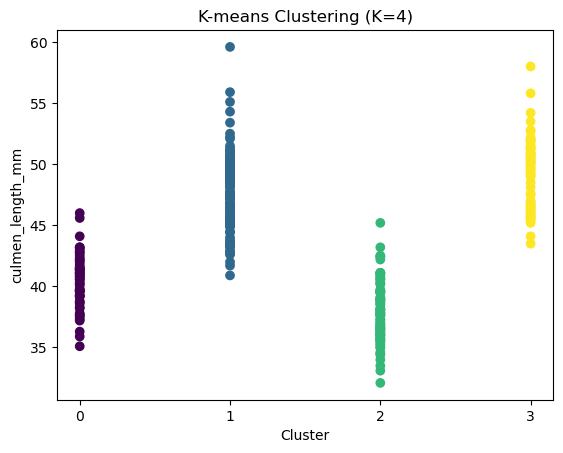

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,40.432203,19.301695,193.711864
1,47.568067,14.996639,217.235294
2,37.944444,17.588889,187.122222
3,49.279688,18.568750,196.921875


In [7]:
# According to the elbow graph, optimal number of cluster is 4
n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(preprocessed_penguins)
penguins['label'] = kmeans.labels_
plt.scatter(penguins['label'], penguins['culmen_length_mm'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('culmen_length_mm')
plt.xticks(range(int(penguins['label'].min()), int(penguins['label'].max()) + 1))
plt.title(f'K-means Clustering (K={n_clusters})')
plt.show()

numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins[numeric_columns].groupby('label').mean()
stat_penguins